In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import pathlib
import matplotlib.pyplot as plt
from remote_sensing_tools.raster_base import RasterBase, QueryParams, LoadParams
from remote_sensing_tools.stac_config import STACConfig, stac_config_from_toml

# Africa 
In this section we load data over Africa from DE Africa and Element 84.

### Set up area of interest and time to load

In [8]:
africa_query_params = QueryParams(
    product="Sentinel 2",
    bbox=(37.76, 12.49, 37.77, 12.50),
    start_date="2020-11-01",
    end_date="2020-12-01",
)

africa_load_params = LoadParams(
    crs="EPSG:6933", resolution=20, bands=("red", "green", "blue", "nir", "scl")
)

### Set up load from DE Africa

In [9]:
deafrica_config_file = pathlib.Path(
    "../dataset_configuration/digital_earth_africa_stac/digital_earth_africa_stac.toml"
)

deafrica_config_dict = stac_config_from_toml(config_file_path=deafrica_config_file)

deafrica_config = STACConfig(deafrica_config_dict)

In [11]:
deafrica_stac_raster = RasterBase.from_stac_query(
    config=deafrica_config,
    collections=["s2_l2a"],
    query_params=africa_query_params,
    load_params=africa_load_params,
)

deafrica_stac_data = deafrica_stac_raster.data.compute()
deafrica_stac_data

<xarray.Dataset> Size: 124kB
Dimensions:      (y: 63, x: 49, time: 5)
Coordinates:
  * y            (y) float64 504B 1.582e+06 1.582e+06 ... 1.581e+06 1.581e+06
  * x            (x) float64 392B 3.643e+06 3.643e+06 ... 3.644e+06 3.644e+06
    spatial_ref  int32 4B 6933
  * time         (time) datetime64[ns] 40B 2020-11-02T08:06:44 ... 2020-11-27...
Data variables:
    red          (time, y, x) uint16 31kB 1062 1088 1200 827 ... 1442 1516 860
    green        (time, y, x) uint16 31kB 833 927 904 650 ... 973 1044 1112 702
    blue         (time, y, x) uint16 31kB 454 520 595 378 ... 668 670 698 479
    nir          (time, y, x) uint16 31kB 2042 2267 2226 2287 ... 2393 2459 1499

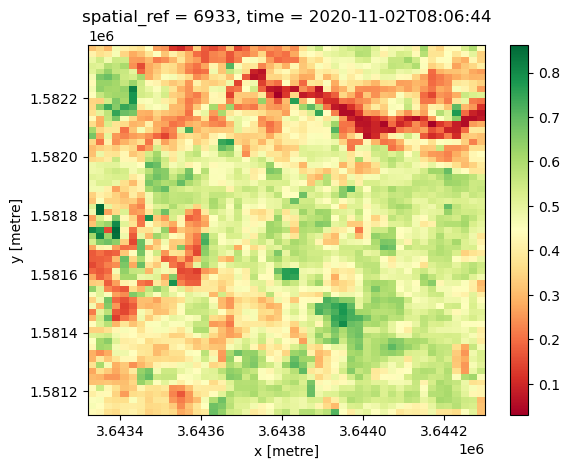

In [14]:
ndvi_deafrica = (deafrica_stac_data.nir - deafrica_stac_data.red) / (
    deafrica_stac_data.nir + deafrica_stac_data.red
)
ndvi_deafrica.isel(time=0).plot(cmap="RdYlGn")

### Set up load from Element 84

In [15]:
element84_africa_config_file = pathlib.Path(
    "../dataset_configuration/element84_stac/element_84_stac.toml"
)

element84_africa_config_dict = stac_config_from_toml(element84_africa_config_file)

element84_africa_config = STACConfig(element84_africa_config_dict)

In [18]:
element84_stac_raster = RasterBase.from_stac_query(
    config=element84_africa_config,
    collections=["sentinel-2-l2a"],
    query_params=africa_query_params,
    load_params=africa_load_params,
)

# element84_africa_stac_data = element84_stac_raster.data.compute()
# element84_africa_stac_data

IsADirectoryError: [Errno 21] Is a directory: '/Users/madeleineseehaber/Documents/Projects/remote-sensing-tools/notebooks'

In [20]:
ds_element84 = RasterBase.load_from_stac(
    catalog_url="https://earth-search.aws.element84.com/v1/",
    collections=["sentinel-2-l2a"],
    stac_config=None,
    aws_endpoint="s3.us-west-2.amazonaws.com",
)

ds_element84

AttributeError: type object 'RasterBase' has no attribute 'load_from_stac'

In [ ]:
ds_element84 = ds_element84.compute()
ds_element84

In [ ]:
ndvi_element84 = (ds_element84.nir - ds_element84.red) / (
    ds_element84.nir + ds_element84.red
)
ndvi_element84.isel(time=0).plot(cmap="RdYlGn")

In [ ]:
ndvi_element84.max()

In [ ]:
de_africa_dt = type(ds_deafrica)
africa_element84_dt = type(ds_element84)
de_africa_dt

In [ ]:
same_x_dim = ds_element84.dims["x"] == ds_deafrica.dims["x"]
same_x_dim

In [ ]:
same_y_dim = ds_element84.dims["y"] == ds_deafrica.dims["y"]
same_y_dim

In [ ]:
for var_name, data_array in ds_element84.data_vars.items():
    print(f"Data type of variable '{var_name}': {data_array.dtype}")

In [ ]:
for var_name, data_array in ds_deafrica.data_vars.items():
    print(f"Data type of variable '{var_name}': {data_array.dtype}")

# Australia 
In this section we load data over Australia from DE Africa and Element 84.

### Set up area of interest and time to load

In [ ]:
# Set a bounding box
# [xmin, ymin, xmax, ymax] in latitude and longitude
bbox = (145.02, -37.46, 145.01, -37.45)

# Set geospatial information for output
output_crs = "EPSG:3577"
output_resolution = 10

# Set a start and end date
start_date = "2020-11-01"
end_date = "2020-12-01"

In [ ]:
# Set geospatial information
bands = ("red", "green", "blue", "nir")

In [ ]:
load_info = LoadInfo(
    bbox=bbox,
    crs=output_crs,
    bands=bands,
    resolution=output_resolution,
    start_date=start_date,
    end_date=end_date,
)

In [ ]:
eo_data_config = EOData(load_info)

In [ ]:
ds_aus_element84 = eo_data_config.load_from_stac(
    catalog_url="https://earth-search.aws.element84.com/v1/",
    collections=["sentinel-2-l2a"],
    stac_config=None,
    aws_endpoint="s3.us-west-2.amazonaws.com",
)

ds_aus_element84

In [ ]:
ds_aus_element84 = ds_aus_element84.compute()
ds_aus_element84

In [ ]:
ndvi_aus_element84 = (ds_aus_element84.nir - ds_aus_element84.red) / (
    ds_aus_element84.nir + ds_aus_element84.red
)
ndvi_aus_element84.isel(time=1).plot(cmap="RdYlGn")

### Loading DE Australia data

In [ ]:
de_australia_config = {
    "ga_s2am_ard_3": {
        "assets": {
            "*": {
                "data_type": "int16",
                "nodata": -999,
                "unit": "1",
            },
            "oa_mask": {
                "data_type": "uint8",
                "nodata": 0,
                "unit": "1",
            },
        },
        "aliases": {
            "coastal_aerosol": "nbart_coastal_aerosol",
            "blue": "nbart_blue",
            "green": "nbart_green",
            "red": "nbart_red",
            "red_edge_1": "nbart_red_edge_1",
            "red_edge_2": "nbart_red_edge_2",
            "red_edge_3": "nbart_red_edge_3",
            "nbart_common_nir": "nbart_nir_1",
            "nir_2": "nbart_nir_2",
            "swir2": "nbart_swir_2",
            "nbart_common_swir_2": "nbart_swir_3",
            "fmask": "oa_mask",
        },
    }
}

In [ ]:
de_aus_bands = ("red", "green", "blue")

In [ ]:
de_aus_load_info = LoadInfo(
    bbox=bbox,
    crs=output_crs,
    bands=de_aus_bands,
    resolution=output_resolution,
    start_date=start_date,
    end_date=end_date,
)

In [ ]:
eo_data_config_deaus = EOData(de_aus_load_info)

In [ ]:
ds_de_aus = eo_data_config_deaus.load_from_stac(
    catalog_url="https://explorer.sandbox.dea.ga.gov.au/stac",
    collections=["ga_s2am_ard_3"],
    stac_config=de_australia_config,
    aws_endpoint="s3.ap-southeast-2.amazonaws.com",
)

ds_de_aus

In [ ]:
ds_de_aus = ds_de_aus.compute()

ds_de_aus